In [17]:
!pip install nolds

##Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import nolds

##Reading csv file and ploting the Data

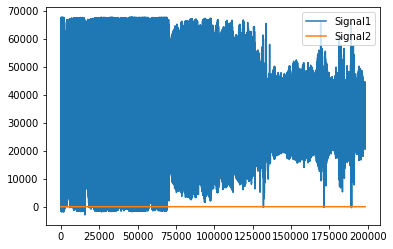

In [10]:
df = pd.read_csv('/content/intern_dataset.csv')
df = df.dropna()
df.plot()
#pd.to_datetime(df['Time'])
#scaler = StandardScaler()

#X_train = scaler.fit_transform(df[['Signal1','Signal2']])

In [11]:
df['Label'].unique() # identifying number of classes

array(['A'], dtype=object)

In [9]:
X_train = df[df.columns[1:3]].values

In [ ]:
X_train

array([[3.36680919e+04, 8.56725975e-01],
       [3.25649030e+04, 8.56705345e-01],
       [3.14540433e+04, 8.56683176e-01],
       ...,
       [3.46719676e+04, 1.51372892e-01],
       [3.46708779e+04, 1.51358824e-01],
       [3.46696949e+04, 1.51342453e-01]])

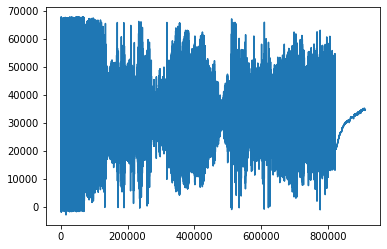

In [ ]:
plt.plot(X_train[:,0])


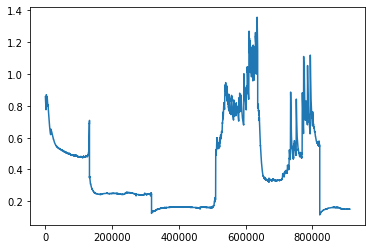

In [ ]:
plt.plot(X_train[:,1])

## Fractal analysis with Hurst Exponent
The Hurst exponent is a measure for the “long-term memory” of a time series, meaning the long statistical dependencies in the data that do not originate from cycles.
According to this method if:
estimated Hurst exponent K:

####if K = 0.5 there are no long-range correlations in the data,
####if K < 0.5 there are negative long-range correlations, 
####if K > 0.5 there are positive long-range correlations)

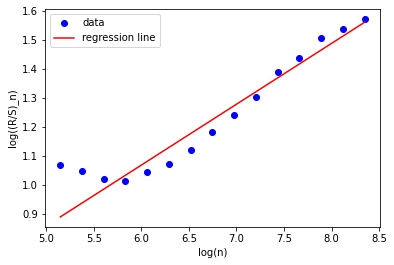

(0.7095860476116933,
 (array([5.14749448, 5.37527841, 5.60211882, 5.83188248, 6.06145692,
         6.28971557, 6.51914729, 6.74758653, 6.97634807, 7.20489251,
         7.43366654, 7.66199756, 7.89095672, 8.11969625, 8.34830105]),
  array([3.79872021, 3.89988682, 3.99176239, 4.10413564, 4.25611966,
         4.40177943, 4.57108295, 4.74955057, 4.92521938, 5.10781431,
         5.30889107, 5.47482893, 5.66009469, 5.80772022, 5.9575756 ]),
  array([ 0.20958605, -0.18770183])))

In [4]:
nolds.hurst_rs(X_train[:,0], nvals=None, fit=u'RANSAC', 
               debug_plot=True, debug_data=True, 
               plot_file=None, corrected=True, unbiased=True)

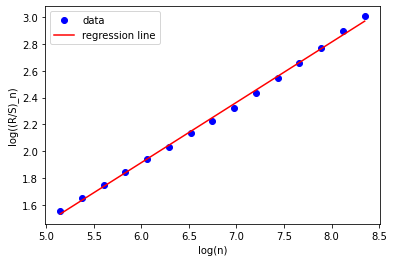

(0.949209162216516,
 (array([5.14749448, 5.37527841, 5.60211882, 5.83188248, 6.06145692,
         6.28971557, 6.51914729, 6.74758653, 6.97634807, 7.20489251,
         7.43366654, 7.66199756, 7.89095672, 8.11969625, 8.34830105]),
  array([4.28336051, 4.50387115, 4.71605315, 4.93443579, 5.14859439,
         5.36055345, 5.58244975, 5.79298002, 6.01038394, 6.23949185,
         6.46238537, 6.69680269, 6.91944338, 7.16350189, 7.39235092]),
  array([ 0.44920916, -0.77975357])))

In [5]:
nolds.hurst_rs(X_train[:,1], nvals=None, fit=u'RANSAC', 
               debug_plot=True, debug_data=True, 
               plot_file=None, corrected=True, unbiased=True)

Interpretation:
As the Hurst Exponent is calculated for both Series(Signal1 and Signal2) and the both provide the value of K above 0.5.
**(For signal1 0.71 and for Signal2 0.95 )**
So there is positive long-range correlation between the data.

## Fractal analysis using Detrended fluctuation analysis

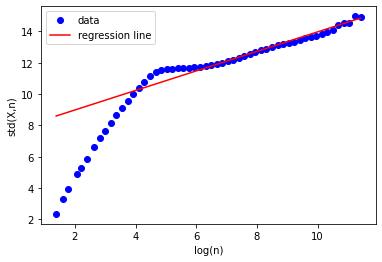

(0.6238606253435632,
 (array([ 1.38629436,  1.60943791,  1.79175947,  2.07944154,  2.19722458,
          2.39789527,  2.63905733,  2.83321334,  2.99573227,  3.17805383,
          3.36729583,  3.55534806,  3.73766962,  3.93182563,  4.11087386,
          4.29045944,  4.47733681,  4.66343909,  4.84418709,  5.03043792,
          5.21493576,  5.39362755,  5.5759491 ,  5.75890177,  5.94279938,
          6.12468339,  6.30809844,  6.49072353,  6.67329797,  6.8554088 ,
          7.03790596,  7.22037384,  7.40245152,  7.58477308,  7.767264  ,
          7.94979722,  8.13211877,  8.31434234,  8.49678638,  8.67914196,
          8.86135011,  9.04369529,  9.22611529,  9.40837122,  9.59076114,
          9.77303712,  9.95536817, 10.13768973, 10.32002447, 10.50235153,
         10.6846914 , 10.86700532, 11.04933324, 11.2316495 , 11.41397768]),
  array([ 2.34436083,  3.27103321,  3.92779327,  4.88410821,  5.25851344,
          5.87965019,  6.60391275,  7.17163376,  7.63439439,  8.14053521,
          8.643

In [21]:
nolds.dfa(X_train[:,0], nvals= None, overlap=True, order=2, fit_trend=u'poly', fit_exp=u'RANSAC', 
          debug_plot=True, debug_data=True, plot_file=None)

According to this analysis,for **alpha = 0.5** we have no correlation or “memory”, for **0.5 < alpha < 1** we have a memory with positive correlation and for **alpha < 0.5** the correlation is negative.
So for the Signal1, value of **alpha is 0.64**, so positive correlation exist between the data of Signal1

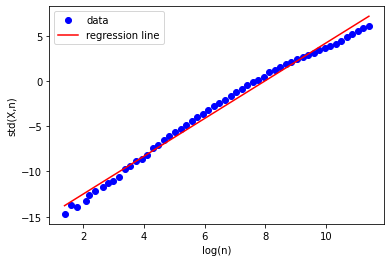

(2.0878928739886002,
 (array([ 1.38629436,  1.60943791,  1.79175947,  2.07944154,  2.19722458,
          2.39789527,  2.63905733,  2.83321334,  2.99573227,  3.17805383,
          3.36729583,  3.55534806,  3.73766962,  3.93182563,  4.11087386,
          4.29045944,  4.47733681,  4.66343909,  4.84418709,  5.03043792,
          5.21493576,  5.39362755,  5.5759491 ,  5.75890177,  5.94279938,
          6.12468339,  6.30809844,  6.49072353,  6.67329797,  6.8554088 ,
          7.03790596,  7.22037384,  7.40245152,  7.58477308,  7.767264  ,
          7.94979722,  8.13211877,  8.31434234,  8.49678638,  8.67914196,
          8.86135011,  9.04369529,  9.22611529,  9.40837122,  9.59076114,
          9.77303712,  9.95536817, 10.13768973, 10.32002447, 10.50235153,
         10.6846914 , 10.86700532, 11.04933324, 11.2316495 , 11.41397768]),
  array([-14.69461308, -13.70601291, -13.90679284, -13.30048088,
         -12.56559258, -12.1867617 , -11.71907093, -11.29735331,
         -11.10313583, -10.632721

In [6]:
nolds.dfa(X_train[:,1], nvals= None, overlap=True, order=2, fit_trend=u'poly', fit_exp=u'RANSAC', 
          debug_plot=True, debug_data=True, plot_file=None)

if alpha > 1 the underlying process is non-stationary and can be modeled as fractional Brownian motion. Here the value of **alpha is 1.800** for Signal2 data Series, so the process is non-stationary.

###Analysis

According to above analysis, it can be concluded that the Detrended fluctuation analysis provides the better result wrt computational cost associated with the dfa